# MISSING DATA EXPLO FOR WEATHER DATASET (HOURLY)

### Load Weather Data

In [1]:
import pandas as pd
from pathlib import Path

In [2]:
input_weather_dir_hourly = "/Volumes/SSD/Epfl/Master/MA3/FBD/data/intermediate/parquet/weather/hourly/"
input_weather_dir_6min = "/Volumes/SSD/Epfl/Master/MA3/FBD/data/intermediate/parquet/weather/6minute/"

print("Hourly weather directory exists:", Path(input_weather_dir_hourly).exists())
print("6-minute weather directory exists:", Path(input_weather_dir_6min).exists())

Hourly weather directory exists: True
6-minute weather directory exists: True


In [3]:
def check_missing_ws_values(df):
    df = df[['ws']]
    missing_data = df.isnull().sum()
    missing_percentage = (missing_data / len(df)) * 100
    missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
    return missing_df

In [4]:
from tqdm import tqdm
from pathlib import Path

missing_ws_stats_list_hourly = []

weather_files_hourly = [f for f in Path(input_weather_dir_hourly).glob("*.parquet") if not f.name.startswith("._")]
        
iterator = tqdm(weather_files_hourly, desc="Computing missing values pct for all stations (hourly)")
for energy_file in iterator:
    station_id = energy_file.stem
    df_weather = pd.read_parquet(energy_file)

    missing_ws_df = check_missing_ws_values(df_weather)
    missing_ws_values = missing_ws_df.loc['ws', 'Missing Values']
    missing_ws_percentage = missing_ws_df.loc['ws', 'Percentage']

    missing_ws_stats_list_hourly.append({
        'station_id': station_id,
        'missing_ws_values': missing_ws_values,
        'missing_ws_percentage': missing_ws_percentage
    })

missing_ws_stats_df_hourly = pd.DataFrame(missing_ws_stats_list_hourly)
missing_ws_stats_df_hourly.head()

Computing missing values pct for all stations (hourly): 100%|██████████| 2105/2105 [05:47<00:00,  6.06it/s]


station_id  missing_ws_values  missing_ws_percentage
0    29179001_PLOUDANIEL-INRAE             174541             100.000000
1              83137001_TOULON               1324               0.755587
2         29264001_LANDIVISIAU                211               0.120574
3  11203004_LEZIGNAN-CORBIERES                506               0.291344
4             04184001_ST-JURS              53294             100.000000

In [5]:
from tqdm import tqdm
from pathlib import Path

missing_ws_stats_list_6min = []

weather_files_6min = [f for f in Path(input_weather_dir_6min).glob("*.parquet") if not f.name.startswith("._")]
        
iterator = tqdm(weather_files_6min, desc="Computing missing values pct for all stations (6min)")
for energy_file in iterator:
    station_id = energy_file.stem
    df_weather = pd.read_parquet(energy_file)

    missing_ws_df = check_missing_ws_values(df_weather)
    missing_ws_values = missing_ws_df.loc['ws', 'Missing Values']
    missing_ws_percentage = missing_ws_df.loc['ws', 'Percentage']

    missing_ws_stats_list_6min.append({
        'station_id': station_id,
        'missing_ws_values': missing_ws_values,
        'missing_ws_percentage': missing_ws_percentage
    })

missing_ws_stats_df_6min = pd.DataFrame(missing_ws_stats_list_6min)
missing_ws_stats_df_6min.head()

Computing missing values pct for all stations (6min): 100%|██████████| 1724/1724 [02:10<00:00, 13.26it/s]


station_id  missing_ws_values  missing_ws_percentage
0                 94068001_ST-MAUR             129912             100.000000
1               59183001_DUNKERQUE                343               0.264055
2  64310001_LANNE-EN-BARETOUS-SAPC             171132             100.000000
3          01072001_CEYZERIAT-SAPC             129911             100.000000
4                 88402002_ROVILLE                 17               0.013101

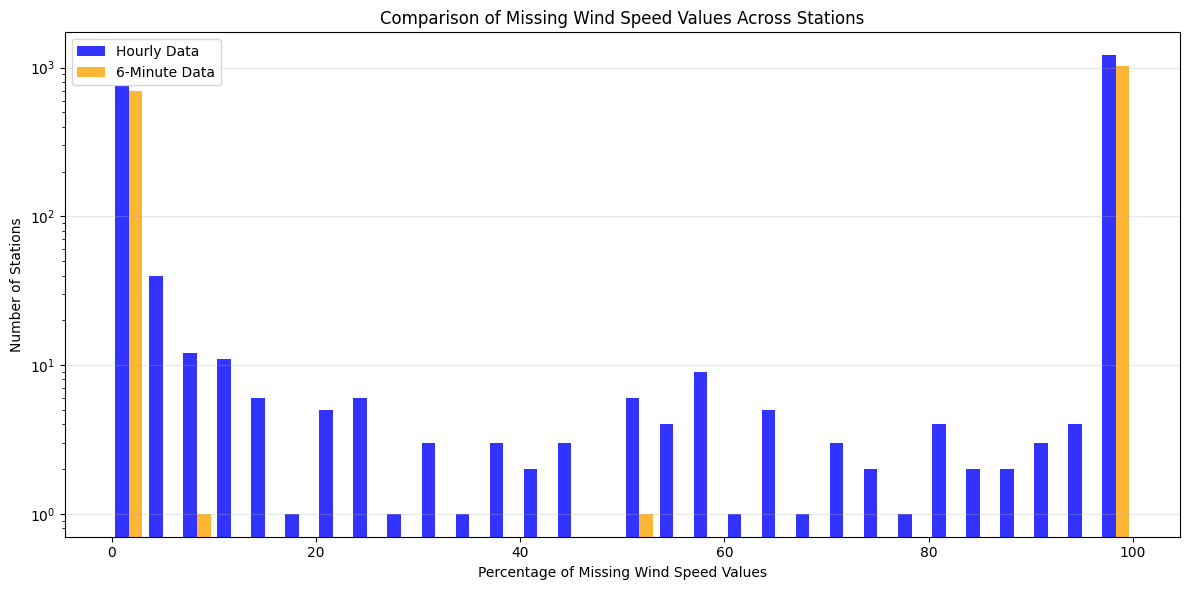

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Compute histogram bins and counts manually
bins = np.linspace(0, 100, 31)  # 30 bins from 0 to 100
counts_hourly, bin_edges = np.histogram(missing_ws_stats_df_hourly['missing_ws_percentage'], bins=bins)
counts_6min, _ = np.histogram(missing_ws_stats_df_6min['missing_ws_percentage'], bins=bins)

# Calculate bin centers for x-axis positions
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_width = bin_edges[1] - bin_edges[0]

# Create grouped bar chart
bar_width = bin_width * 0.4  # Each bar takes 40% of bin width
offset = bar_width / 2

plt.figure(figsize=(12, 6))
plt.bar(bin_centers - offset, counts_hourly, width=bar_width, alpha=0.8, label='Hourly Data', color='blue')
plt.bar(bin_centers + offset, counts_6min, width=bar_width, alpha=0.8, label='6-Minute Data', color='orange')
plt.yscale('log')
plt.xlabel('Percentage of Missing Wind Speed Values')
plt.ylabel('Number of Stations')
plt.title('Comparison of Missing Wind Speed Values Across Stations')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


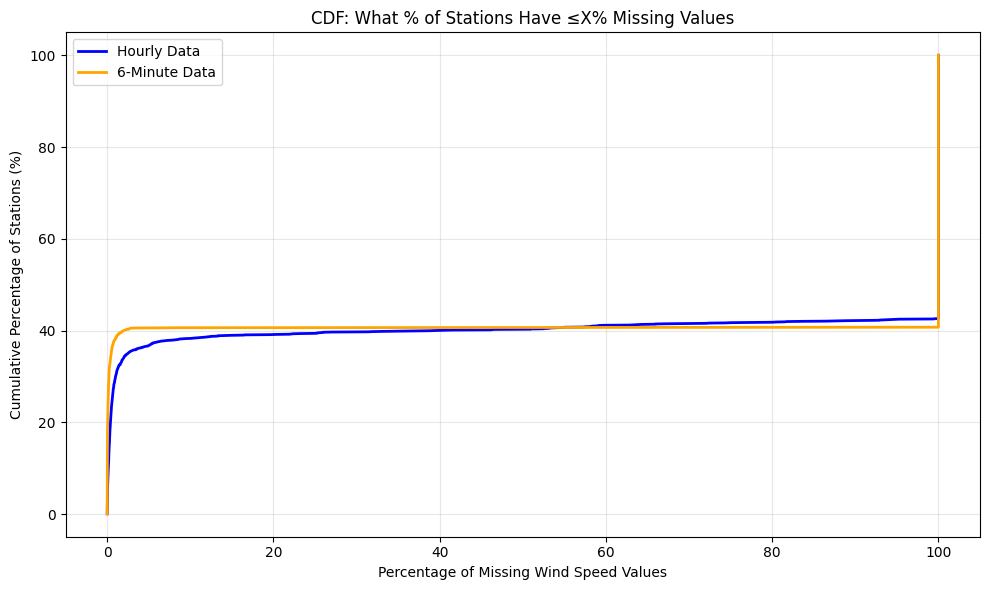

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

# Sort data and compute cumulative percentages
sorted_hourly = np.sort(missing_ws_stats_df_hourly['missing_ws_percentage'])
sorted_6min = np.sort(missing_ws_stats_df_6min['missing_ws_percentage'])

cdf_hourly = np.arange(1, len(sorted_hourly) + 1) / len(sorted_hourly) * 100
cdf_6min = np.arange(1, len(sorted_6min) + 1) / len(sorted_6min) * 100

ax.plot(sorted_hourly, cdf_hourly, linewidth=2, label='Hourly Data', color='blue')
ax.plot(sorted_6min, cdf_6min, linewidth=2, label='6-Minute Data', color='orange')

ax.set_xlabel('Percentage of Missing Wind Speed Values')
ax.set_ylabel('Cumulative Percentage of Stations (%)')
ax.set_title('CDF: What % of Stations Have ≤X% Missing Values')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


/var/folders/47/q7m6g30d4ksfgl3r0ssyl_7h0000gn/T/ipykernel_14308/1592064730.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data, labels=['Hourly Data', '6-Minute Data'],


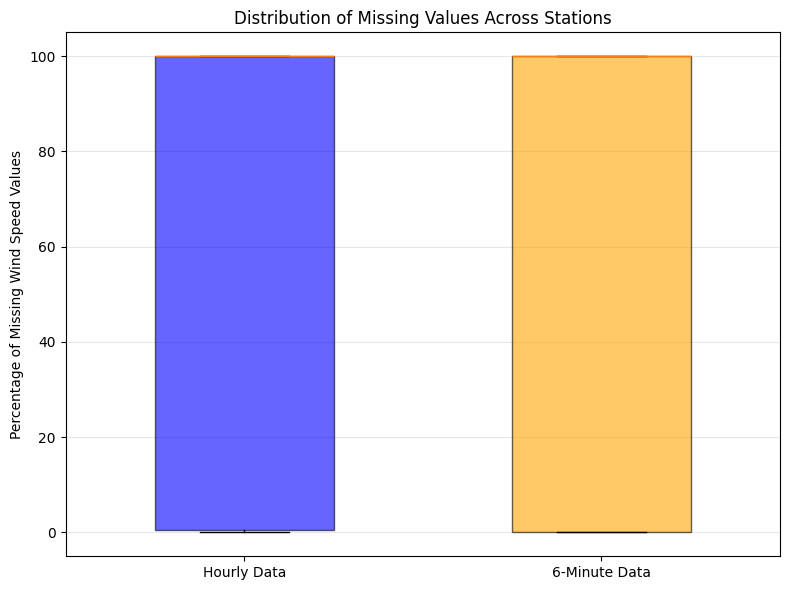

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

data = [missing_ws_stats_df_hourly['missing_ws_percentage'], 
        missing_ws_stats_df_6min['missing_ws_percentage']]

bp = ax.boxplot(data, labels=['Hourly Data', '6-Minute Data'], 
                patch_artist=True, widths=0.5)

# Color the boxes
bp['boxes'][0].set_facecolor('blue')
bp['boxes'][0].set_alpha(0.6)
bp['boxes'][1].set_facecolor('orange')
bp['boxes'][1].set_alpha(0.6)

ax.set_ylabel('Percentage of Missing Wind Speed Values')
ax.set_title('Distribution of Missing Values Across Stations')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


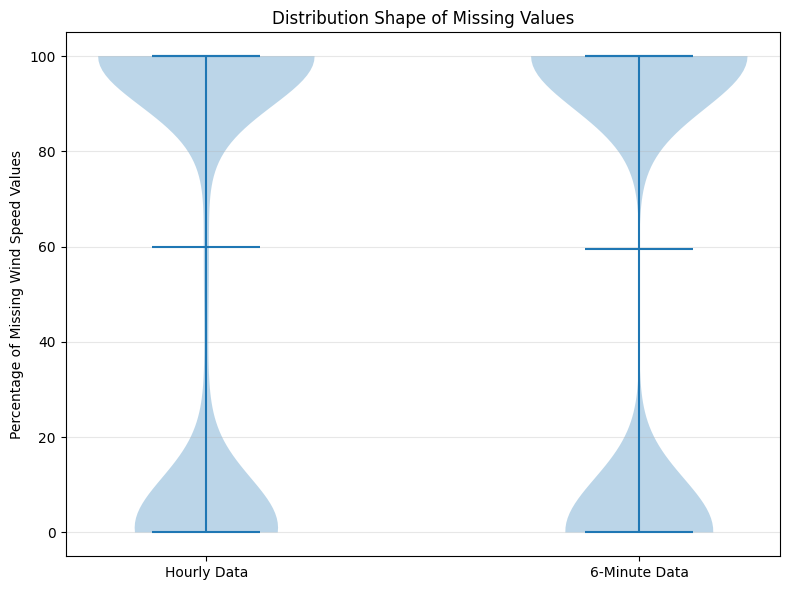

In [79]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

positions = [1, 2]
parts = ax.violinplot([missing_ws_stats_df_hourly['missing_ws_percentage'],
                       missing_ws_stats_df_6min['missing_ws_percentage']], 
                      positions=positions, showmeans=True, showmedians=True)

ax.set_xticks(positions)
ax.set_xticklabels(['Hourly Data', '6-Minute Data'])
ax.set_ylabel('Percentage of Missing Wind Speed Values')
ax.set_title('Distribution Shape of Missing Values')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.savefig('../reports/figures/missing_ws_violin_plot.png', dpi=300, bbox_inches='tight')

plt.show()


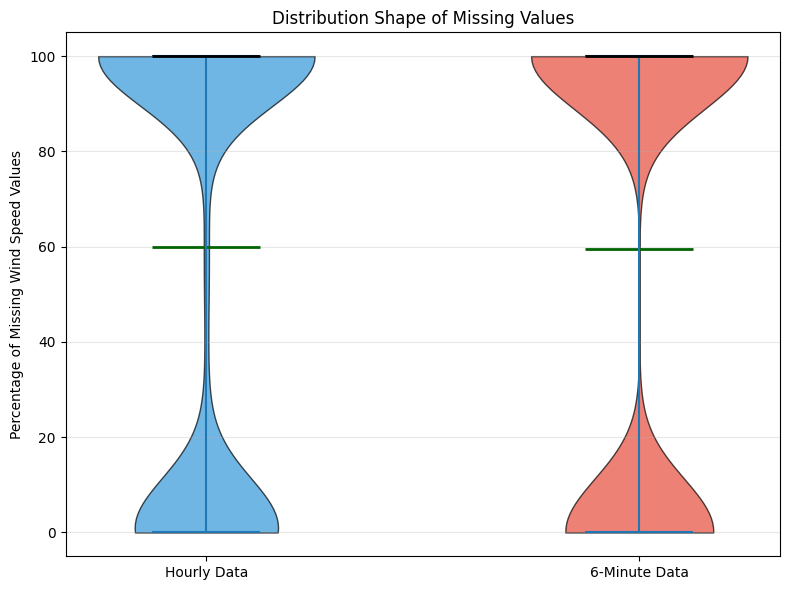

In [75]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

positions = [1, 2]
parts = ax.violinplot([missing_ws_stats_df_hourly['missing_ws_percentage'],
                       missing_ws_stats_df_6min['missing_ws_percentage']], 
                      positions=positions, showmeans=True, showmedians=True)

# Apply distinct colors
colors = ['#3498db', '#e74c3c']  # Blue and red
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Customize lines
parts['cmeans'].set_color('darkgreen')
parts['cmeans'].set_linewidth(2)
parts['cmedians'].set_color('black')
parts['cmedians'].set_linewidth(2)

ax.set_xticks(positions)
ax.set_xticklabels(['Hourly Data', '6-Minute Data'])
ax.set_ylabel('Percentage of Missing Wind Speed Values')
ax.set_title('Distribution Shape of Missing Values')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


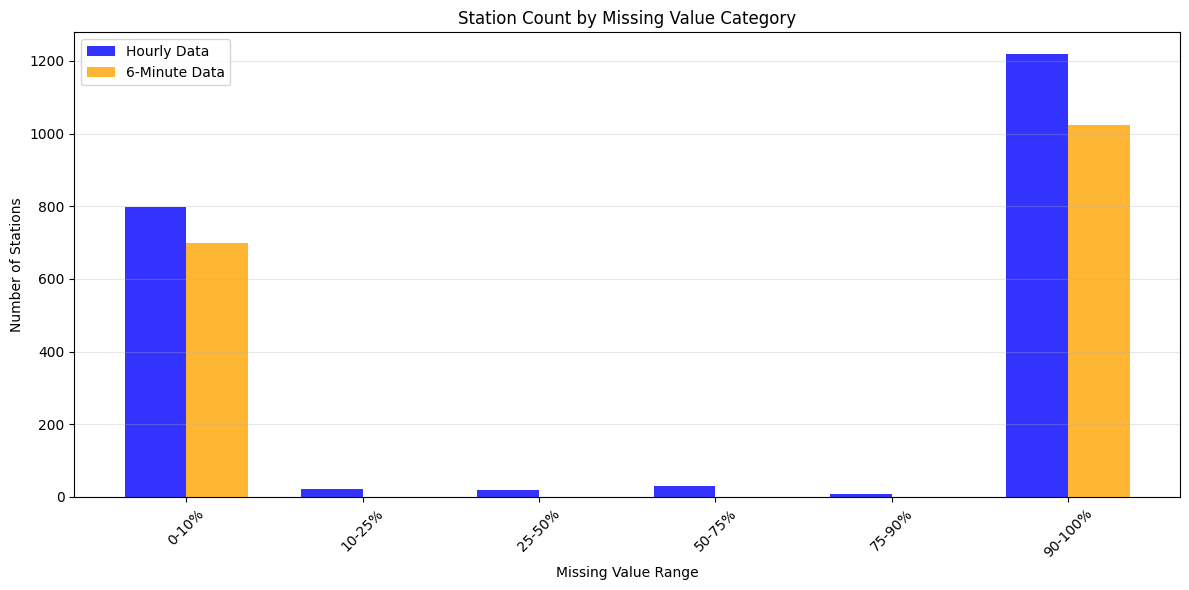

In [21]:
# Define meaningful categories
bins = [0, 10, 25, 50, 75, 90, 100]
labels = ['0-10%', '10-25%', '25-50%', '50-75%', '75-90%', '90-100%']

hourly_binned = pd.cut(missing_ws_stats_df_hourly['missing_ws_percentage'], 
                       bins=bins, labels=labels).value_counts().sort_index()
min_binned = pd.cut(missing_ws_stats_df_6min['missing_ws_percentage'], 
                     bins=bins, labels=labels).value_counts().sort_index()

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, hourly_binned, width, label='Hourly Data', color='blue', alpha=0.8)
ax.bar(x + width/2, min_binned, width, label='6-Minute Data', color='orange', alpha=0.8)

ax.set_xlabel('Missing Value Range')
ax.set_ylabel('Number of Stations')
ax.set_title('Station Count by Missing Value Category')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


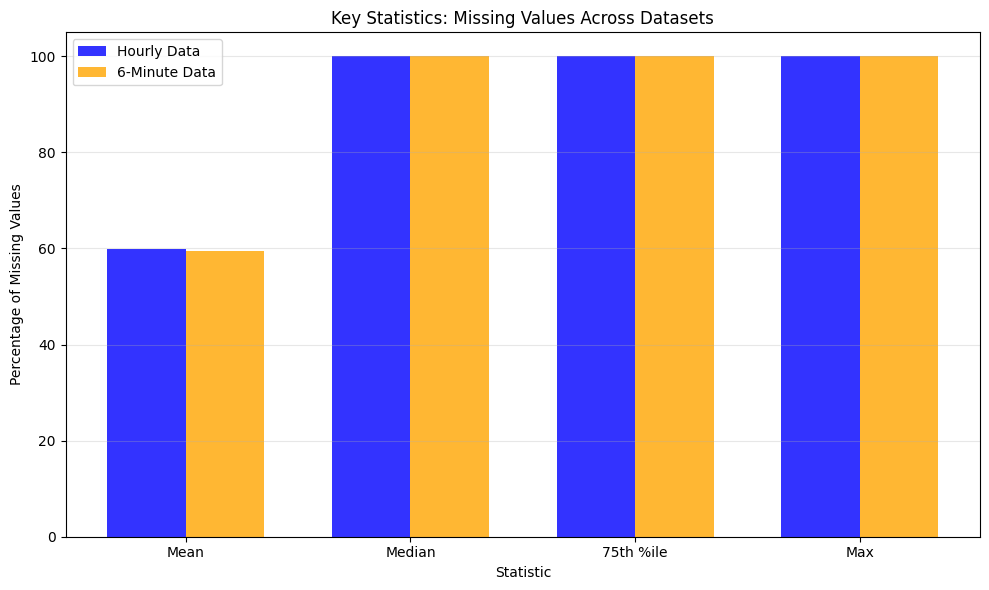

In [23]:
summary_stats = pd.DataFrame({
    'Hourly': missing_ws_stats_df_hourly['missing_ws_percentage'].describe(),
    '6-Minute': missing_ws_stats_df_6min['missing_ws_percentage'].describe()
})

metrics = ['mean', '50%', '75%', 'max']
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, summary_stats.loc[metrics, 'Hourly'], width, 
       label='Hourly Data', color='blue', alpha=0.8)
ax.bar(x + width/2, summary_stats.loc[metrics, '6-Minute'], width, 
       label='6-Minute Data', color='orange', alpha=0.8)

ax.set_xlabel('Statistic')
ax.set_ylabel('Percentage of Missing Values')
ax.set_title('Key Statistics: Missing Values Across Datasets')
ax.set_xticks(x)
ax.set_xticklabels(['Mean', 'Median', '75th %ile', 'Max'])
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


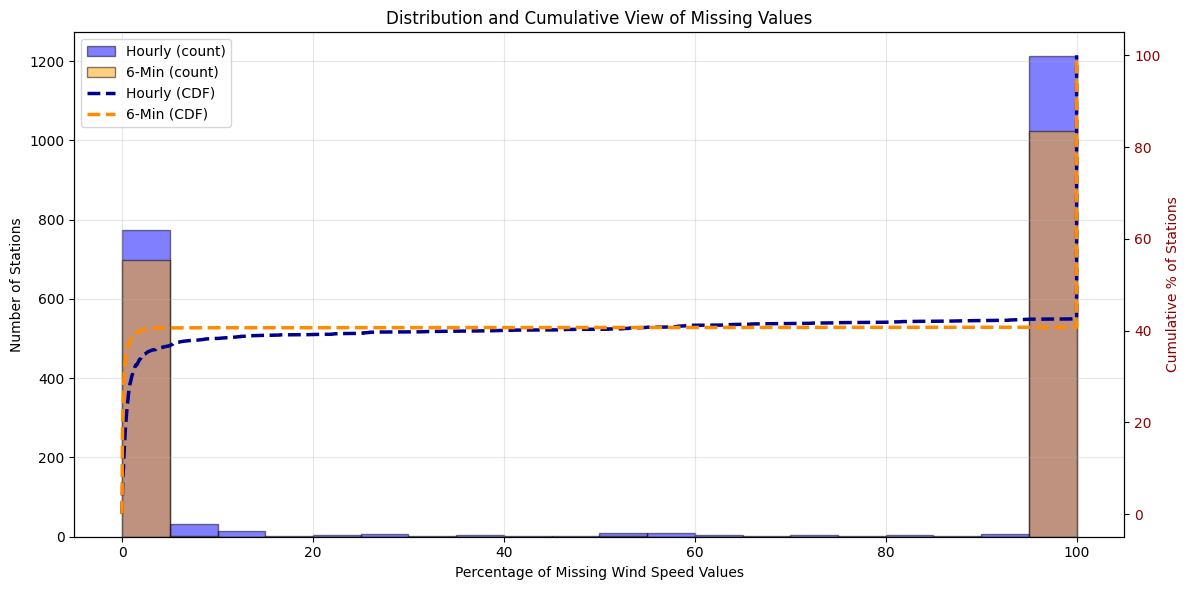

In [24]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Histogram on primary axis
bins_edges = np.linspace(0, 100, 21)
ax1.hist(missing_ws_stats_df_hourly['missing_ws_percentage'], bins=bins_edges, 
         alpha=0.5, label='Hourly (count)', color='blue', edgecolor='black')
ax1.hist(missing_ws_stats_df_6min['missing_ws_percentage'], bins=bins_edges, 
         alpha=0.5, label='6-Min (count)', color='orange', edgecolor='black')
ax1.set_xlabel('Percentage of Missing Wind Speed Values')
ax1.set_ylabel('Number of Stations', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# CDF on secondary axis
ax2 = ax1.twinx()
sorted_hourly = np.sort(missing_ws_stats_df_hourly['missing_ws_percentage'])
sorted_6min = np.sort(missing_ws_stats_df_6min['missing_ws_percentage'])
cdf_h = np.arange(1, len(sorted_hourly) + 1) / len(sorted_hourly) * 100
cdf_6 = np.arange(1, len(sorted_6min) + 1) / len(sorted_6min) * 100

ax2.plot(sorted_hourly, cdf_h, linewidth=2.5, label='Hourly (CDF)', 
         color='darkblue', linestyle='--')
ax2.plot(sorted_6min, cdf_6, linewidth=2.5, label='6-Min (CDF)', 
         color='darkorange', linestyle='--')
ax2.set_ylabel('Cumulative % of Stations', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

ax1.set_title('Distribution and Cumulative View of Missing Values')
ax1.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [25]:
meta_list = []
for f in weather_files_hourly:
    station_id = f.stem
    try:
        meta = pd.read_parquet(f, columns=['lon', 'lat']).iloc[0]
        meta_list.append({'station_id': station_id, 'lon': float(meta['lon']), 'lat': float(meta['lat'])})
    except Exception:
        meta_list.append({'station_id': station_id, 'lon': None, 'lat': None})
        print(f"Could not read metadata for station {station_id}")

meta_df = pd.DataFrame(meta_list)

missing_ws_with_loc_hourly = missing_ws_stats_df_hourly.merge(meta_df, on='station_id', how='left')
missing_ws_with_loc_hourly = missing_ws_with_loc_hourly.sort_values('missing_ws_percentage', ascending=False)

# show top stations with highest missing percentages
missing_ws_with_loc_hourly.head(20)

station_id  missing_ws_values  missing_ws_percentage  \
0       29179001_PLOUDANIEL-INRAE             174541                  100.0   
1379       13055001_MARSEILLE-OBS              17544                  100.0   
1393            35026001_BLERUAIS              17544                  100.0   
1392                  76255002_EU              17544                  100.0   
1391          82174001_ST-VINCENT              17544                  100.0   
1390       65188005_GAVARNIE_SAPC              17544                  100.0   
1389         97422455_PONT-D-YVES              17544                  100.0   
1388         98823001_PONERIHOUEN              17543                  100.0   
1387    97408580_LA-NOUVELLE_SAPC              17544                  100.0   
1386  60260001_FRESNOY-LA-RIVIERE              17544                  100.0   
1383               66049001_CERET              17544                  100.0   
1382            97303001_IRACOUBO              17469                  100.0   
1380           51545001_SOMMESOUS              17544                  100.0   
1378          90044001_FELON_SAPC              17544                  100.0   
1395    53159002_MONTOURTIER_SAPC              17413                  100.0   
1377     55014001_AUBREVILLE_SAPC              17544                  100.0   
1375      79176001_MENIGOUTE_SAPC              17544                  100.0   
1374            61345003_REMALARD              17544                  100.0   
1373            98739003_RAIRUA-1               3165                  100.0   
1368           64480001_ST-GLADIE              17544                  100.0   

             lon        lat  
0      -4.327700  48.503799  
1379    5.394300  43.305698  
1393   -2.124200  48.111500  
1392    1.421000  50.057999  
1391    1.459700  44.170700  
1390   -0.010800  42.733799  
1389   55.503201 -21.231300  
1388  165.404297 -21.072201  
1387   55.423302 -21.076700  
1386    2.918300  49.284801  
1383    2.747500  42.496300  
1382  -53.212299   5.480200  
1380    4.207500  48.734200  
1378    6.984200  47.704300  
1395   -0.538700  48.209801  
1377    5.093500  49.133801  
1375   -0.064300  46.493999  
1374    0.777700  48.433998  
1373 -147.660004 -23.880800  
1368   -0.933700  43.380199

In [26]:
meta_list = []
for f in weather_files_6min:
    station_id = f.stem
    try:
        meta = pd.read_parquet(f, columns=['lon', 'lat']).iloc[0]
        meta_list.append({'station_id': station_id, 'lon': float(meta['lon']), 'lat': float(meta['lat'])})
    except Exception:
        meta_list.append({'station_id': station_id, 'lon': None, 'lat': None})
        print(f"Could not read metadata for station {station_id}")

meta_df = pd.DataFrame(meta_list)

missing_ws_with_loc_6min = missing_ws_stats_df_6min.merge(meta_df, on='station_id', how='left')
missing_ws_with_loc_6min = missing_ws_with_loc_6min.sort_values('missing_ws_percentage', ascending=False)

# show top stations with highest missing percentages
missing_ws_with_loc_6min.head(20)

station_id  missing_ws_values  \
0                     94068001_ST-MAUR             129912   
975                    74063002_CHATEL             174946   
989              12039001_BRUSQUE-SAPC             129910   
987                   50174001_EQUILLY             174839   
984              36141001_NEUVY-ST-SEP             174926   
983                      63129001_CROS             174924   
982                  36169001_PRUNIERS             174867   
981                 42299001_SAVIGNEUX             174944   
976                     17111001_CLION             174938   
972                   65447001_TOURNAY             174935   
991                    09301001_SOULAN             160276   
969  61179001_FRESNAYE-AU-SAUVAGE-SAPC             129898   
967                    52443001_SAILLY             174881   
963           07240001_ST-GEORGES-BAIN             129437   
962                    80041001_AUMONT             174918   
961                    03321001_YZEURE             174942   
958           74045001_LE-BOUCHET-SAPC             128979   
957                  61345003_REMALARD             174936   
990                 37253001_SUBLAINES             129915   
992         83043005_COLLOBRIERES-SAPC             129914   

     missing_ws_percentage     lon        lat  
0                    100.0  2.4923  48.808701  
975                  100.0  6.8188  46.255798  
989                  100.0  2.9387  43.749500  
987                  100.0 -1.3887  48.834499  
984                  100.0  1.7985  46.598301  
983                  100.0  2.5950  45.472000  
982                  100.0  2.0450  46.788502  
981                  100.0  4.0787  45.624802  
976                  100.0 -0.5103  45.476799  
972                  100.0  0.2437  43.179001  
991                  100.0  1.2425  42.913502  
969                  100.0 -0.2637  48.722301  
967                  100.0  5.2728  48.433800  
963                  100.0  4.8325  44.860298  
962                  100.0  1.9295  49.883701  
961                  100.0  3.3537  46.579201  
958                  100.0  6.3677  45.799500  
957                  100.0  0.7777  48.433998  
990                  100.0  0.9932  47.264999  
992                  100.0  6.2580  43.232201

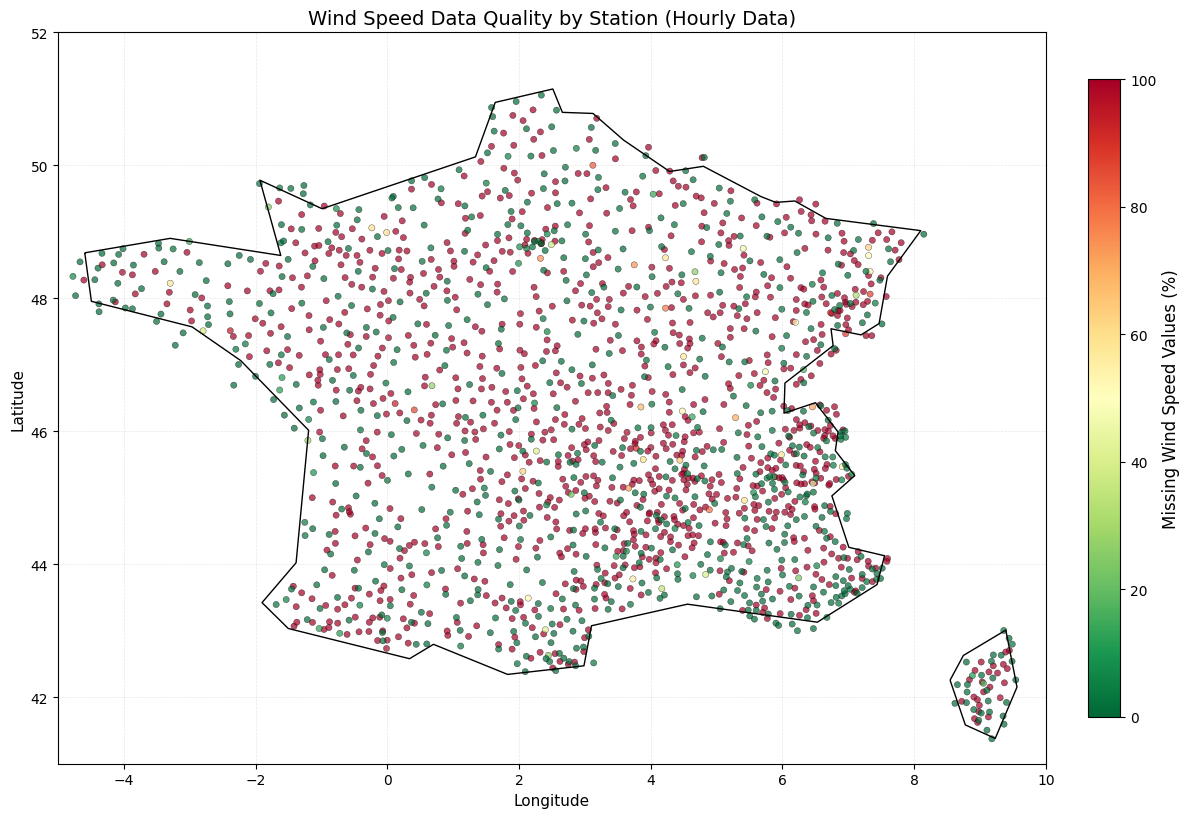

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.cm as cm
from shapely.geometry import Point

# Load France boundary from Natural Earth directly
world = gpd.read_file(
    "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
)
france = world[world.NAME == 'France']

# Create GeoDataFrame for hourly data
geometry_hourly = [Point(xy) for xy in zip(missing_ws_with_loc_hourly['lon'], 
                                             missing_ws_with_loc_hourly['lat'])]
gdf_hourly = gpd.GeoDataFrame(missing_ws_with_loc_hourly, 
                               geometry=geometry_hourly, 
                               crs='EPSG:4326')
gdf_hourly = gdf_hourly.dropna(subset=['lon', 'lat'])

# Create GeoDataFrame for 6-minute data
geometry_6min = [Point(xy) for xy in zip(missing_ws_with_loc_6min['lon'], 
                                          missing_ws_with_loc_6min['lat'])]
gdf_6min = gpd.GeoDataFrame(missing_ws_with_loc_6min, 
                            geometry=geometry_6min, 
                            crs='EPSG:4326')
gdf_6min = gdf_6min.dropna(subset=['lon', 'lat'])

# Plot
fig, ax = plt.subplots(figsize=(12, 14))
france.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

norm = Normalize(vmin=0, vmax=100)
gdf_hourly.plot(ax=ax, 
                column='missing_ws_percentage',
                cmap=cm.RdYlGn_r,
                markersize=20,
                alpha=0.7,
                edgecolor='black',
                linewidth=0.3,
                legend=False,
                norm=norm)

sm = ScalarMappable(cmap=cm.RdYlGn_r, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('Missing Wind Speed Values (%)', fontsize=12)

ax.set_xlim(-5, 10)
ax.set_ylim(41, 52)
ax.set_xlabel('Longitude', fontsize=11)
ax.set_ylabel('Latitude', fontsize=11)
ax.set_title('Wind Speed Data Quality by Station (Hourly Data)', 
             fontsize=14,)
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


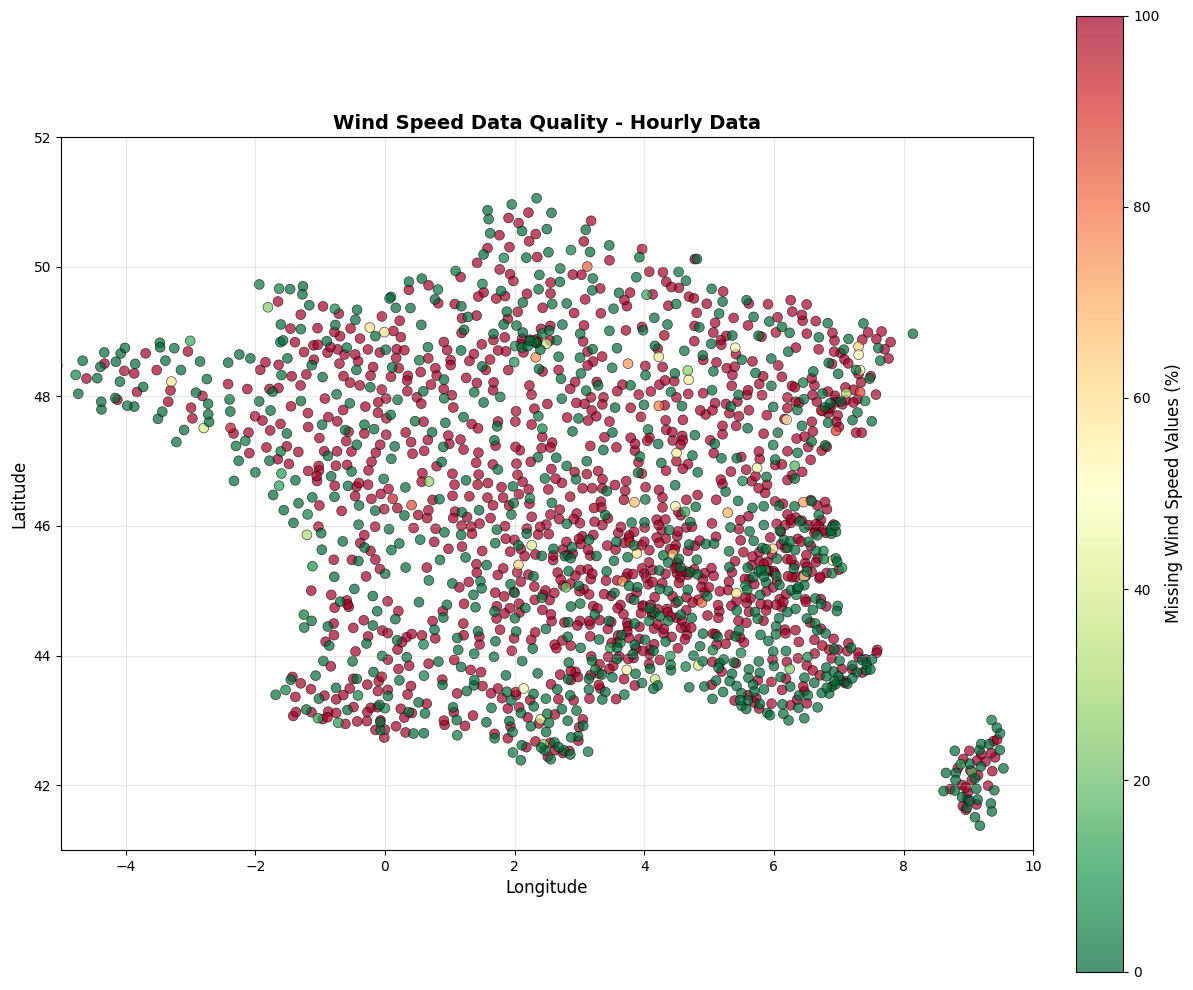

In [30]:
fig, ax = plt.subplots(figsize=(12, 10))

# Plot hourly data
scatter = ax.scatter(missing_ws_with_loc_hourly['lon'], 
                     missing_ws_with_loc_hourly['lat'],
                     c=missing_ws_with_loc_hourly['missing_ws_percentage'],
                     cmap=cm.RdYlGn_r,
                     s=50,
                     alpha=0.7,
                     edgecolors='black',
                     linewidth=0.5,
                     vmin=0, vmax=100)

cbar = plt.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Missing Wind Speed Values (%)', fontsize=12)

ax.set_xlim(-5, 10)
ax.set_ylim(41, 52)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_title('Wind Speed Data Quality - Hourly Data', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')
plt.tight_layout()
plt.show()


/var/folders/47/q7m6g30d4ksfgl3r0ssyl_7h0000gn/T/ipykernel_14308/2182584231.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


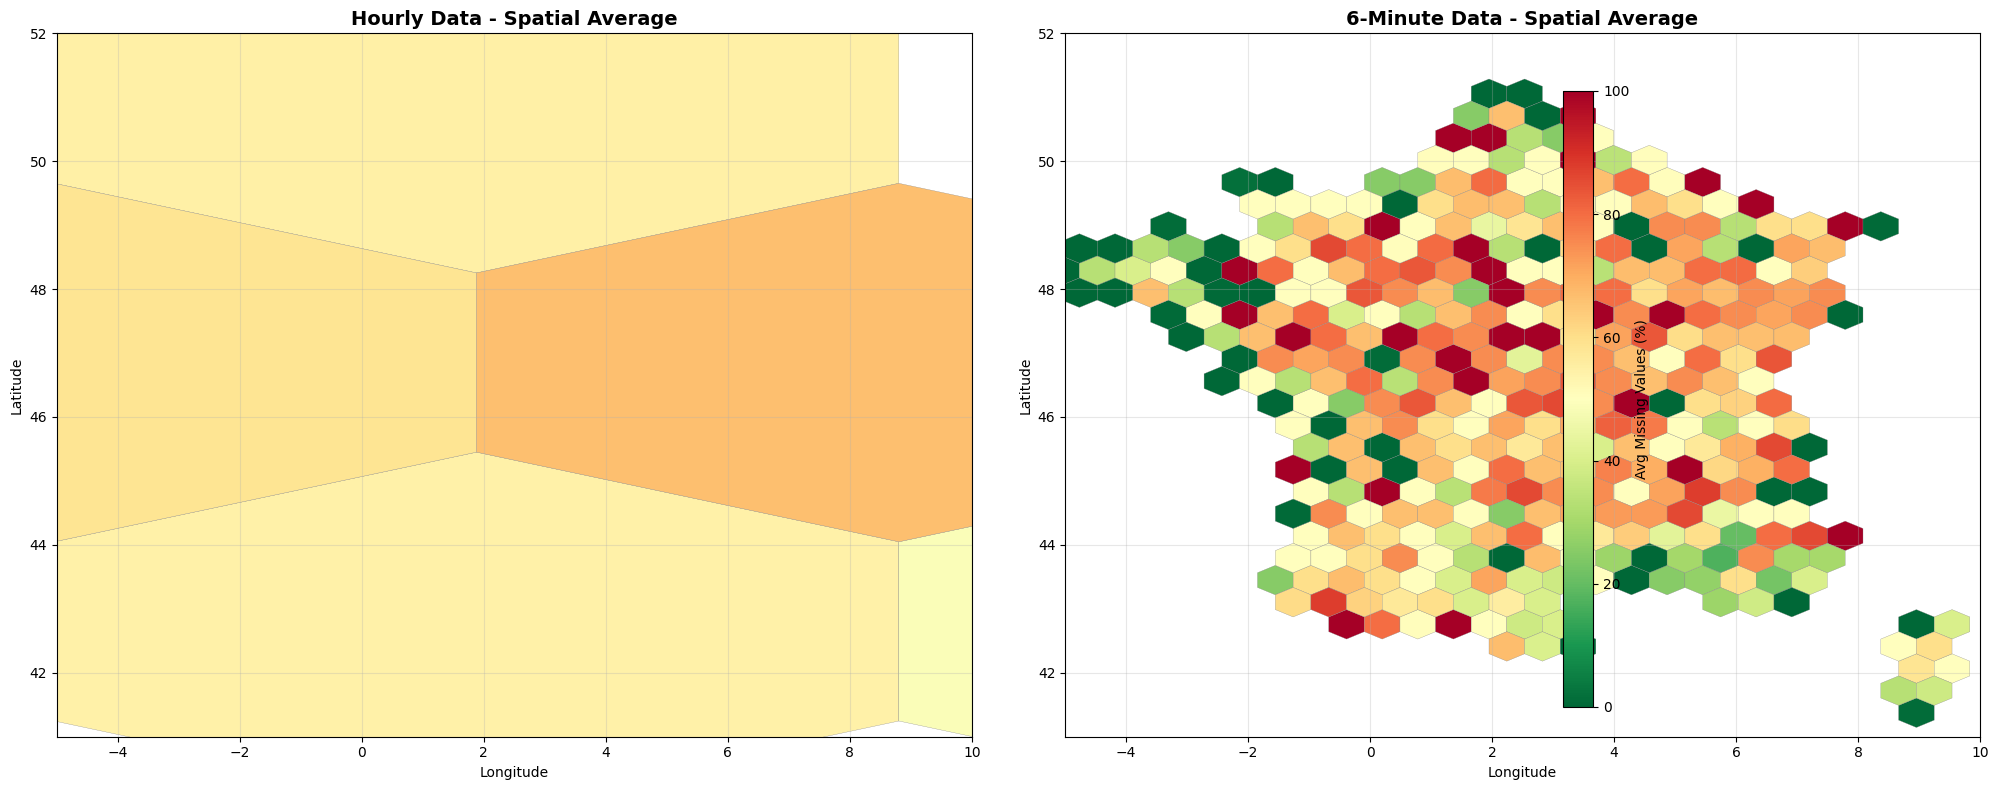

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Hourly hexbin
hb1 = ax1.hexbin(missing_ws_with_loc_hourly['lon'],
                 missing_ws_with_loc_hourly['lat'],
                 C=missing_ws_with_loc_hourly['missing_ws_percentage'],
                 gridsize=25,
                 cmap=cm.RdYlGn_r,
                 vmin=0, vmax=100,
                 reduce_C_function=np.mean,
                 mincnt=1,
                 edgecolors='gray',
                 linewidths=0.2)
ax1.set_xlim(-5, 10)
ax1.set_ylim(41, 52)
ax1.set_title('Hourly Data - Spatial Average', fontsize=14, fontweight='bold')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.grid(True, alpha=0.3)

# 6-minute hexbin
hb2 = ax2.hexbin(missing_ws_with_loc_6min['lon'],
                 missing_ws_with_loc_6min['lat'],
                 C=missing_ws_with_loc_6min['missing_ws_percentage'],
                 gridsize=25,
                 cmap=cm.RdYlGn_r,
                 vmin=0, vmax=100,
                 reduce_C_function=np.mean,
                 mincnt=1,
                 edgecolors='gray',
                 linewidths=0.2)
ax2.set_xlim(-5, 10)
ax2.set_ylim(41, 52)
ax2.set_title('6-Minute Data - Spatial Average', fontsize=14, fontweight='bold')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.grid(True, alpha=0.3)

# Shared colorbar
fig.colorbar(hb2, ax=[ax1, ax2], label='Avg Missing Values (%)', pad=0.01)
plt.tight_layout()
plt.show()


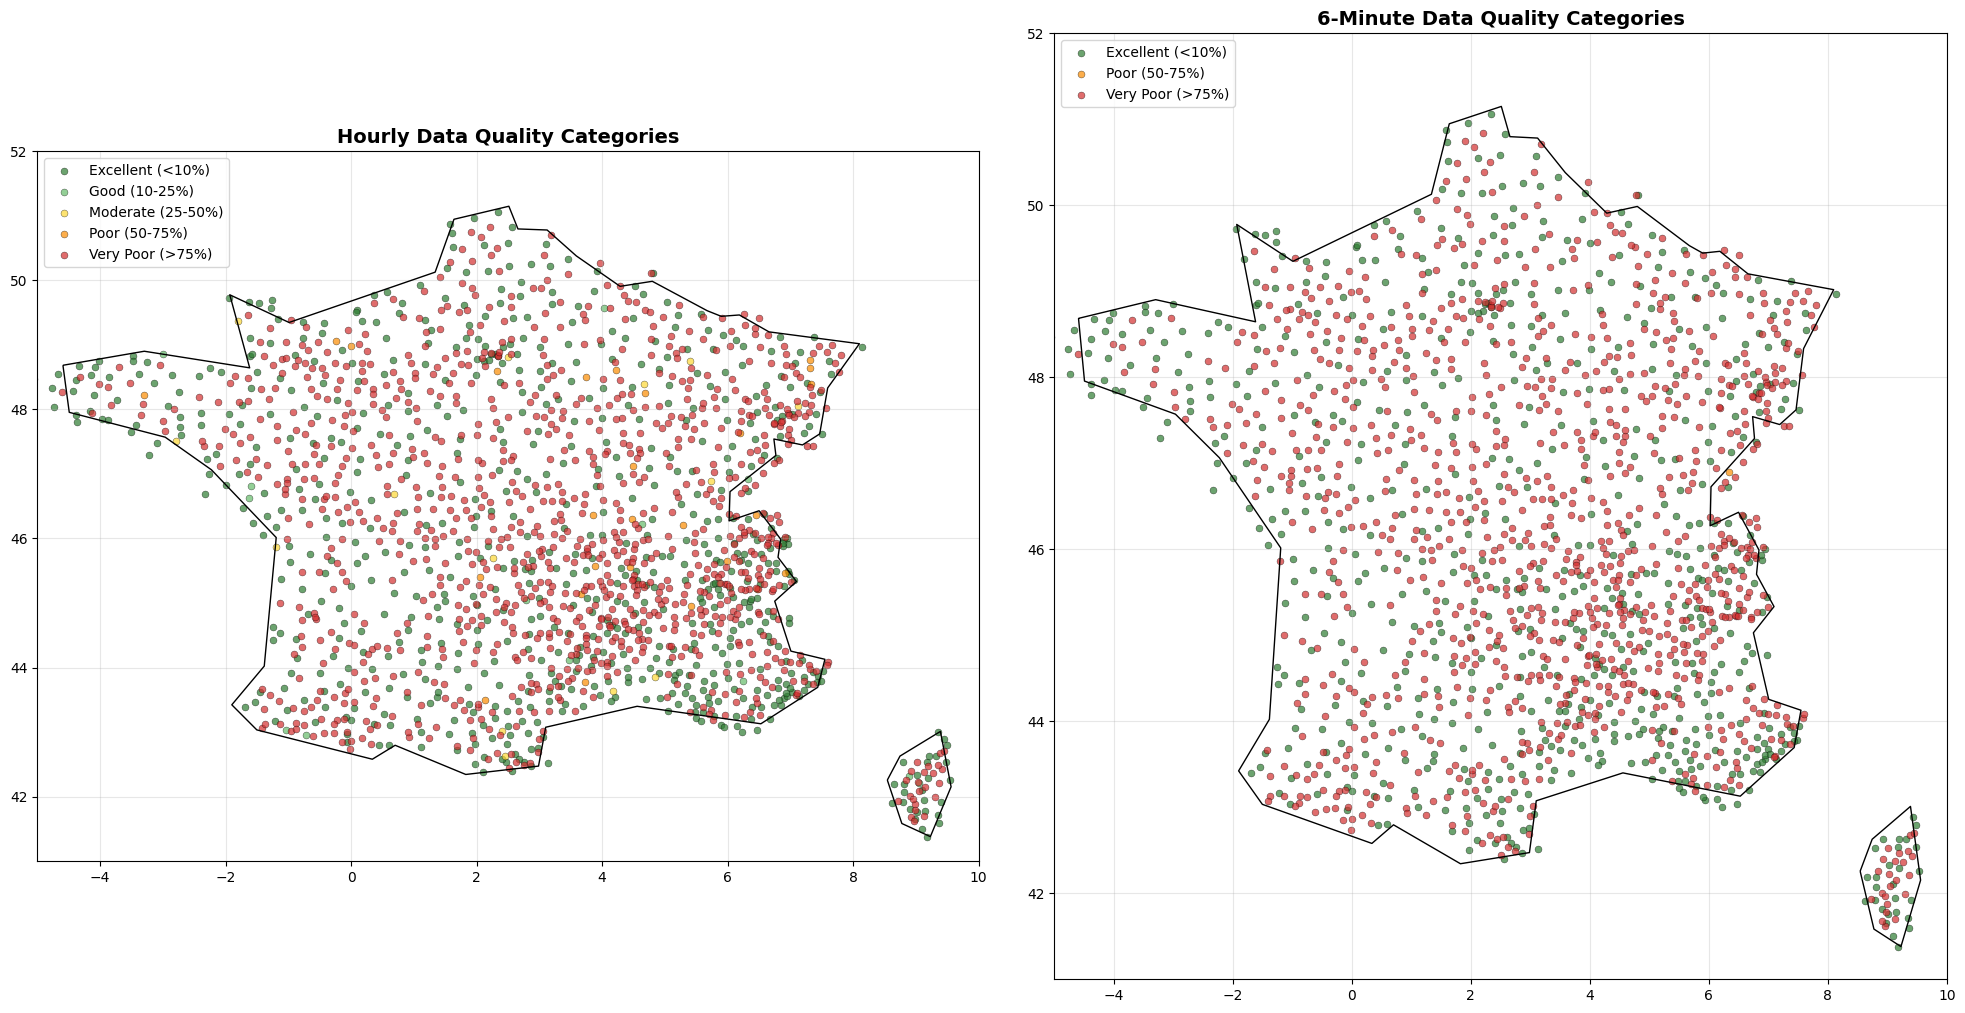

In [34]:
# Define quality categories
def categorize_quality(pct):
    if pct < 10:
        return 'Excellent (<10%)'
    elif pct < 25:
        return 'Good (10-25%)'
    elif pct < 50:
        return 'Moderate (25-50%)'
    elif pct < 75:
        return 'Poor (50-75%)'
    else:
        return 'Very Poor (>75%)'

gdf_hourly['quality_category'] = gdf_hourly['missing_ws_percentage'].apply(categorize_quality)
gdf_6min['quality_category'] = gdf_6min['missing_ws_percentage'].apply(categorize_quality)

# Define colors for categories
color_map = {
    'Excellent (<10%)': '#2E7D32',  # Dark green
    'Good (10-25%)': '#66BB6A',     # Light green
    'Moderate (25-50%)': '#FDD835',  # Yellow
    'Poor (50-75%)': '#FB8C00',      # Orange
    'Very Poor (>75%)': '#D32F2F'    # Red
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Hourly map
france.boundary.plot(ax=ax1, linewidth=1, edgecolor='black')
for category, color in color_map.items():
    subset = gdf_hourly[gdf_hourly['quality_category'] == category]
    if len(subset) > 0:
        subset.plot(ax=ax1, color=color, markersize=25, alpha=0.7,
                   edgecolor='black', linewidth=0.3, label=category)
ax1.set_xlim(-5, 10)
ax1.set_ylim(41, 52)
ax1.set_title('Hourly Data Quality Categories', fontsize=14, fontweight='bold')
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(True, alpha=0.3)

# 6-minute map
france.boundary.plot(ax=ax2, linewidth=1, edgecolor='black')
for category, color in color_map.items():
    subset = gdf_6min[gdf_6min['quality_category'] == category]
    if len(subset) > 0:
        subset.plot(ax=ax2, color=color, markersize=25, alpha=0.7,
                   edgecolor='black', linewidth=0.3, label=category)
ax2.set_xlim(-5, 10)
ax2.set_ylim(41, 52)
ax2.set_title('6-Minute Data Quality Categories', fontsize=14, fontweight='bold')
ax2.legend(loc='upper left', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


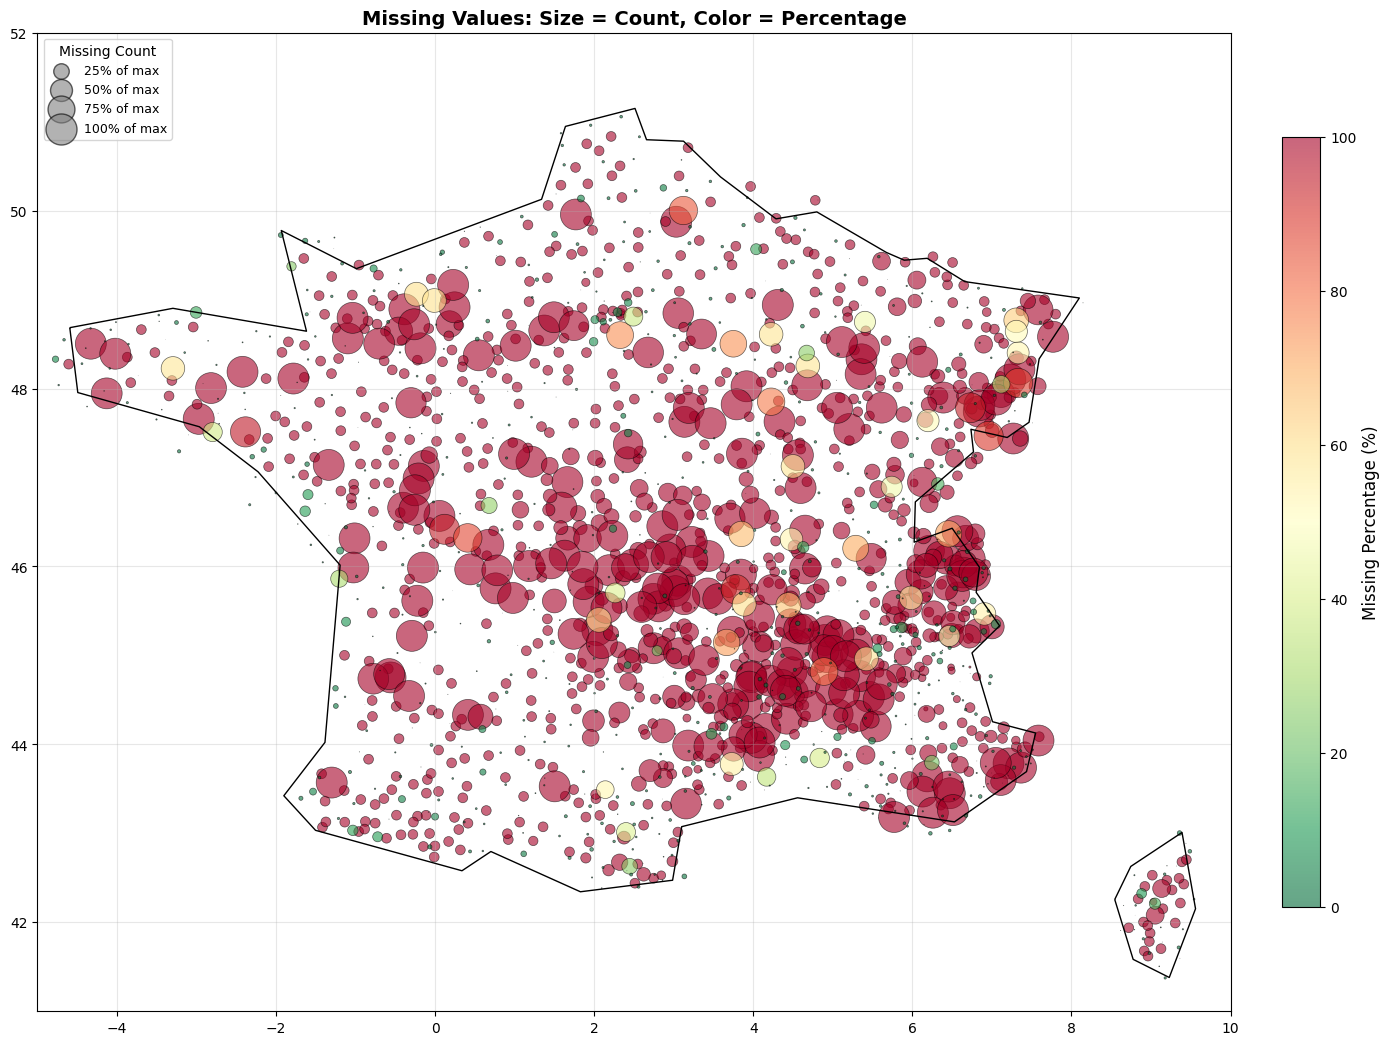

In [35]:
fig, ax = plt.subplots(figsize=(14, 12))
france.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

# Scale marker sizes based on absolute missing count
sizes = gdf_hourly['missing_ws_values'] / gdf_hourly['missing_ws_values'].max() * 500

scatter = ax.scatter(gdf_hourly.geometry.x,
                     gdf_hourly.geometry.y,
                     s=sizes,
                     c=gdf_hourly['missing_ws_percentage'],
                     cmap=cm.RdYlGn_r,
                     alpha=0.6,
                     edgecolors='black',
                     linewidth=0.5,
                     vmin=0, vmax=100)

cbar = plt.colorbar(scatter, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('Missing Percentage (%)', fontsize=12)

# Add size legend
for size_val in [0.25, 0.5, 0.75, 1.0]:
    ax.scatter([], [], s=size_val*500, c='gray', alpha=0.6, 
              edgecolors='black', label=f'{int(size_val*100)}% of max')
ax.legend(scatterpoints=1, title='Missing Count', loc='upper left', fontsize=9)

ax.set_xlim(-5, 10)
ax.set_ylim(41, 52)
ax.set_title('Missing Values: Size = Count, Color = Percentage', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [85]:
import geopandas as gpd
from shapely.geometry import Point

# Step 1: Create GeoDataFrames from your data with lon/lat
# (Assuming you already have missing_ws_with_loc_hourly and missing_ws_with_loc_6min 
# which contain: station_id, missing_ws_percentage, lon, lat)

# For hourly data
geometry_hourly = [Point(xy) for xy in zip(missing_ws_with_loc_hourly['lon'], 
                                             missing_ws_with_loc_hourly['lat'])]
gdf_hourly = gpd.GeoDataFrame(missing_ws_with_loc_hourly, 
                               geometry=geometry_hourly, 
                               crs='EPSG:4326')  # WGS84 lat/lon

# Remove stations with missing coordinates
gdf_hourly = gdf_hourly.dropna(subset=['lon', 'lat'])

# For 6-minute data
geometry_6min = [Point(xy) for xy in zip(missing_ws_with_loc_6min['lon'], 
                                          missing_ws_with_loc_6min['lat'])]
gdf_6min = gpd.GeoDataFrame(missing_ws_with_loc_6min, 
                            geometry=geometry_6min, 
                            crs='EPSG:4326')

# Remove stations with missing coordinates
gdf_6min = gdf_6min.dropna(subset=['lon', 'lat'])


# Step 2: Filter to metropolitan France bounds
metro_bounds = {
    'lon_min': -5.5,
    'lon_max': 10.0,
    'lat_min': 41.0,
    'lat_max': 51.5
}

# Filter hourly data
gdf_hourly_metro = gdf_hourly[
    (gdf_hourly['lon'] >= metro_bounds['lon_min']) &
    (gdf_hourly['lon'] <= metro_bounds['lon_max']) &
    (gdf_hourly['lat'] >= metro_bounds['lat_min']) &
    (gdf_hourly['lat'] <= metro_bounds['lat_max'])
]

# Filter 6-minute data
gdf_6min_metro = gdf_6min[
    (gdf_6min['lon'] >= metro_bounds['lon_min']) &
    (gdf_6min['lon'] <= metro_bounds['lon_max']) &
    (gdf_6min['lat'] >= metro_bounds['lat_min']) &
    (gdf_6min['lat'] <= metro_bounds['lat_max'])
]


# Step 3: Reproject to Lambert-93 (EPSG:2154)
gdf_hourly_proj = gdf_hourly_metro.to_crs('EPSG:2154')
gdf_6min_proj = gdf_6min_metro.to_crs('EPSG:2154')


# Step 4: Load France boundary and reproject
world = gpd.read_file(
    "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
)
france = world[world.NAME == 'France']
france_proj = france.to_crs('EPSG:2154')


# Now you have:
# - gdf_hourly_proj: hourly stations in Lambert-93
# - gdf_6min_proj: 6-minute stations in Lambert-93
# - france_proj: France boundary in Lambert-93

print(f"Hourly stations (metropolitan): {len(gdf_hourly_proj)}")
print(f"6-minute stations (metropolitan): {len(gdf_6min_proj)}")

Hourly stations (metropolitan): 1805
6-minute stations (metropolitan): 1724


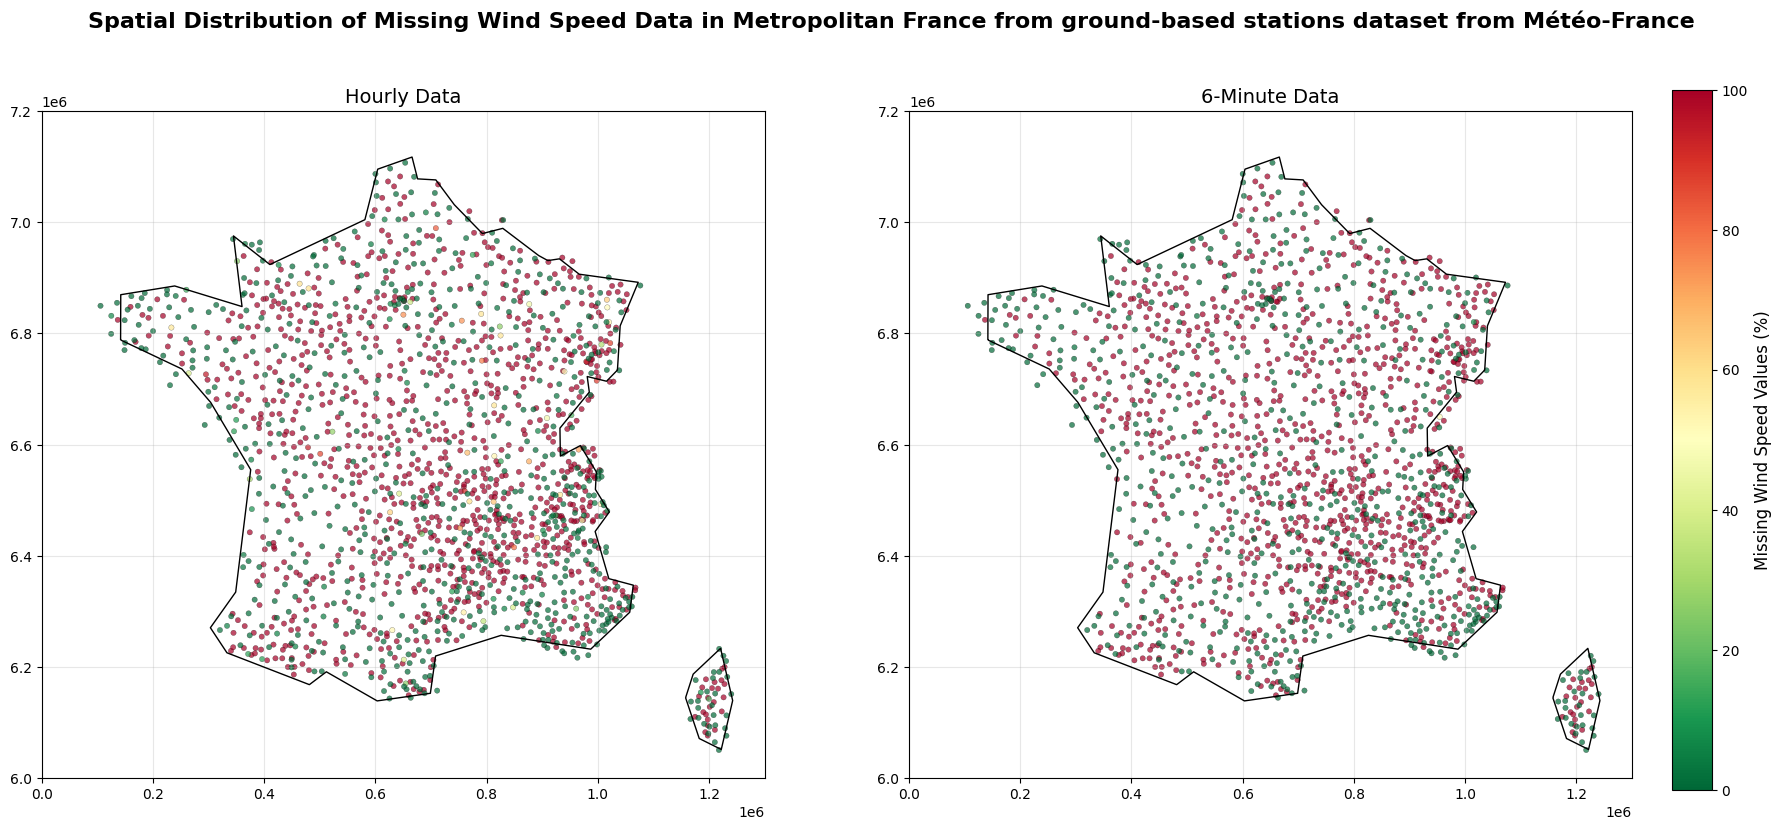

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Hourly data
france_proj.boundary.plot(ax=ax1, linewidth=1, edgecolor='black')
gdf_hourly_proj.plot(ax=ax1, 
                     column='missing_ws_percentage',
                     cmap=cm.RdYlGn_r,
                     markersize=15,
                     alpha=0.7,
                     edgecolor='black',
                     linewidth=0.2,
                     legend=False,
                     norm=norm)
ax1.set_xlim(0, 1.3e6)
ax1.set_ylim(6e6, 7.2e6)
ax1.set_title('Hourly Data', fontsize=14)
ax1.grid(True, alpha=0.3)

# 6-minute data
france_proj.boundary.plot(ax=ax2, linewidth=1, edgecolor='black')
gdf_6min_proj.plot(ax=ax2, 
                   column='missing_ws_percentage',
                   cmap=cm.RdYlGn_r,
                   markersize=15,
                   alpha=0.7,
                   edgecolor='black',
                   linewidth=0.2,
                   legend=False,
                   norm=norm)
ax2.set_xlim(0, 1.3e6)
ax2.set_ylim(6e6, 7.2e6)
ax2.set_title('6-Minute Data', fontsize=14)
ax2.grid(True, alpha=0.3)

# Adjust subplot positioning to make room for colorbar
fig.subplots_adjust(right=0.92)

# Add colorbar to the right with custom positioning
cbar_ax = fig.add_axes([0.94, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
sm = ScalarMappable(cmap=cm.RdYlGn_r, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Missing Wind Speed Values (%)', fontsize=12)

plt.savefig('../reports/figures/missing_ws_spatial_distribution_no_title.png', dpi=300, bbox_inches='tight')

fig.suptitle('Spatial Distribution of Missing Wind Speed Data in Metropolitan France from ground-based stations dataset from Météo-France', 
             fontsize=16, x=0.55, y=0.93, fontweight='bold')

plt.savefig('../reports/figures/missing_ws_spatial_distribution.png', dpi=300, bbox_inches='tight')




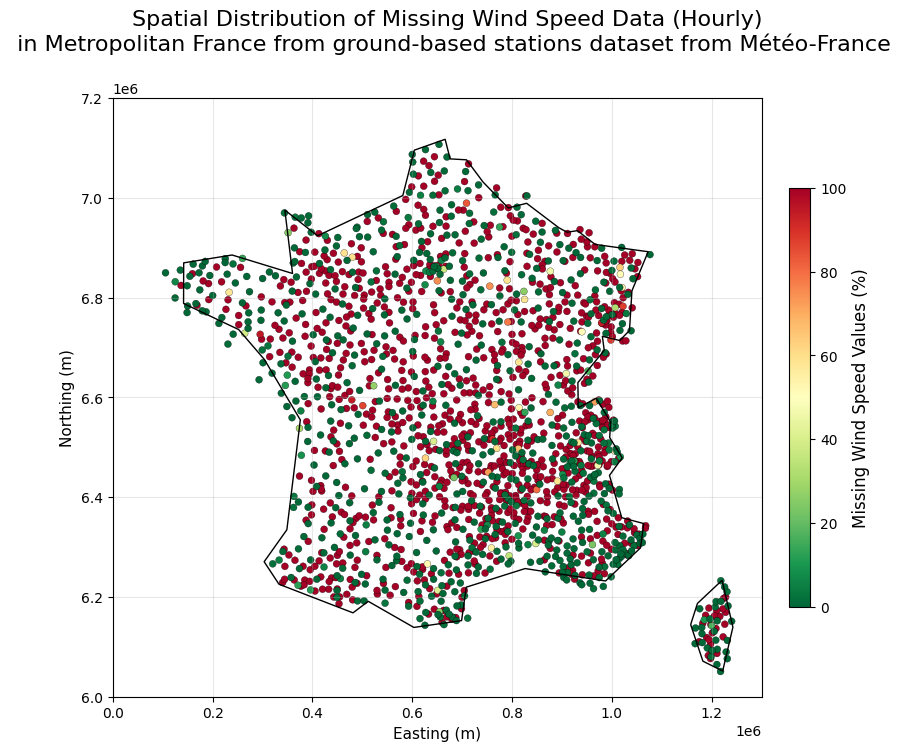

In [103]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.cm as cm

# Create single subplot
fig, ax = plt.subplots(figsize=(9, 8))

# Define normalization
norm = Normalize(vmin=0, vmax=100)

# Plot France boundary
france_proj.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

# Plot hourly data
gdf_hourly_proj.plot(ax=ax, 
                     column='missing_ws_percentage',
                     cmap=cm.RdYlGn_r,
                     markersize=25,
                     alpha=1,
                     edgecolor='black',
                     linewidth=0.2,
                     legend=False,
                     norm=norm)

ax.set_xlim(0, 1.3e6)
ax.set_ylim(6e6, 7.2e6)
ax.set_xlabel('Easting (m)', fontsize=11)
ax.set_ylabel('Northing (m)', fontsize=11)
ax.grid(True, alpha=0.3)

# Add colorbar on the right
sm = ScalarMappable(cmap=cm.RdYlGn_r, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('Missing Wind Speed Values (%)', fontsize=12)

# Save without title
plt.savefig('../reports/figures/missing_ws_spatial_distribution_hourly_no_title.png', dpi=300, bbox_inches='tight')

# Add title
fig.suptitle('Spatial Distribution of Missing Wind Speed Data (Hourly) \n in Metropolitan France from ground-based stations dataset from Météo-France', 
             fontsize=16, y=0.98)

# Save with title
plt.savefig('../reports/figures/missing_ws_spatial_distribution_hourly.png', dpi=300, bbox_inches='tight')

plt.show()


In [87]:
# Print the time range of the 6-min data
if len(weather_files_6min) > 0:
    # Read the first file to get the time range
    sample_file = weather_files_6min[0]
    df_sample = pd.read_parquet(sample_file)
    
    # Assuming the dataframe has a datetime index or column
    if isinstance(df_sample.index, pd.DatetimeIndex):
        min_date = df_sample.index.min()
        max_date = df_sample.index.max()
    elif 'date' in df_sample.columns:
        min_date = df_sample['date'].min()
        max_date = df_sample['date'].max()
    elif 'datetime' in df_sample.columns:
        min_date = df_sample['datetime'].min()
        max_date = df_sample['datetime'].max()
    else:
        # Try to find any datetime column
        datetime_cols = df_sample.select_dtypes(include=['datetime64']).columns
        if len(datetime_cols) > 0:
            min_date = df_sample[datetime_cols[0]].min()
            max_date = df_sample[datetime_cols[0]].max()
        else:
            print("No datetime column found. Available columns:")
            print(df_sample.columns.tolist())
            min_date, max_date = None, None
    
    if min_date is not None and max_date is not None:
        print(f"6-Minute Data Time Range:")
        print(f"  Start: {min_date}")
        print(f"  End: {max_date}")
        print(f"  Duration: {max_date - min_date}")
        print(f"\nSample file checked: {sample_file.name}")
else:
    print("No 6-minute weather files found.")

6-Minute Data Time Range:
  Start: 2023-07-07 12:18:00
  End: 2024-12-31 23:54:00
  Duration: 543 days 11:36:00

Sample file checked: 94068001_ST-MAUR.parquet


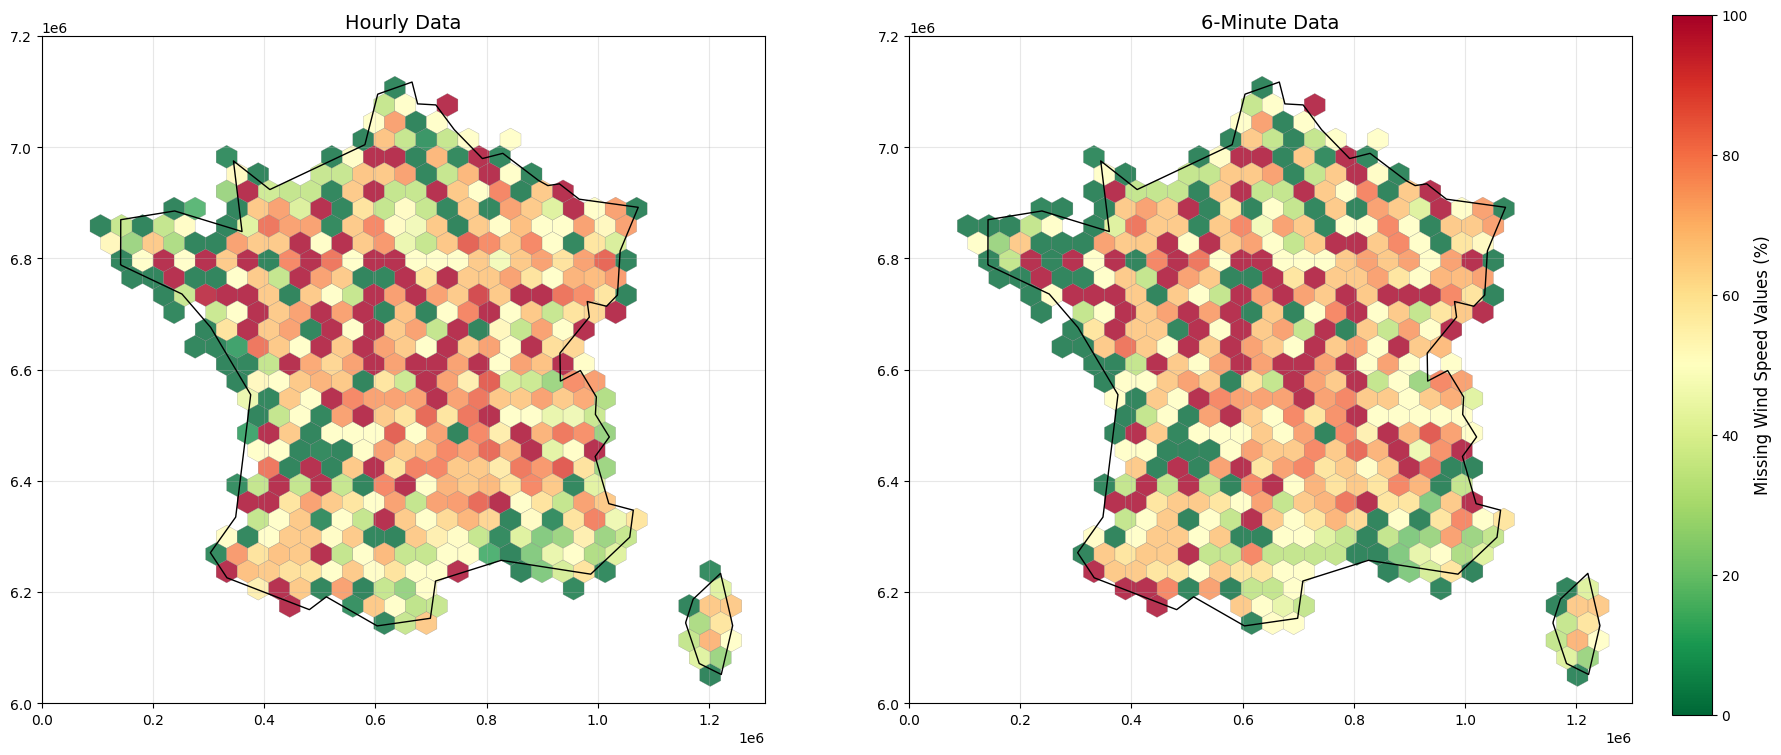

In [82]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.cm as cm
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Set up colormap and normalization
norm = Normalize(vmin=0, vmax=100)
cmap = cm.RdYlGn_r

# Hourly data - hexbin
france_proj.boundary.plot(ax=ax1, linewidth=1, edgecolor='black')

# Extract coordinates and values for hexbin
x_hourly = gdf_hourly_proj.geometry.x
y_hourly = gdf_hourly_proj.geometry.y
c_hourly = gdf_hourly_proj['missing_ws_percentage']

# Create hexbin plot
hb1 = ax1.hexbin(x_hourly, y_hourly, 
                 C=c_hourly,
                 gridsize=30,  # Number of hexagons (adjust for detail level)
                 cmap=cmap,
                 norm=norm,
                 reduce_C_function=np.mean,  # Average missing % per hexagon
                 mincnt=1,  # Minimum points to show hexagon
                 edgecolors='gray',
                 linewidths=0.2,
                 alpha=0.8)

ax1.set_xlim(0, 1.3e6)
ax1.set_ylim(6e6, 7.2e6)
ax1.set_title('Hourly Data', fontsize=14)
ax1.grid(True, alpha=0.3)

# 6-minute data - hexbin
france_proj.boundary.plot(ax=ax2, linewidth=1, edgecolor='black')

# Extract coordinates and values for hexbin
x_6min = gdf_6min_proj.geometry.x
y_6min = gdf_6min_proj.geometry.y
c_6min = gdf_6min_proj['missing_ws_percentage']

# Create hexbin plot
hb2 = ax2.hexbin(x_6min, y_6min,
                 C=c_6min,
                 gridsize=30,
                 cmap=cmap,
                 norm=norm,
                 reduce_C_function=np.mean,
                 mincnt=1,
                 edgecolors='gray',
                 linewidths=0.2,
                 alpha=0.8)

ax2.set_xlim(0, 1.3e6)
ax2.set_ylim(6e6, 7.2e6)
ax2.set_title('6-Minute Data', fontsize=14)
ax2.grid(True, alpha=0.3)

# Adjust subplot positioning to make room for colorbar
fig.subplots_adjust(right=0.92)

# Add colorbar to the right with custom positioning
cbar_ax = fig.add_axes([0.94, 0.15, 0.02, 0.7])
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Missing Wind Speed Values (%)', fontsize=12)

plt.savefig('../reports/figures/missing_ws_spatial_distribution_hexbin_no_title.png', dpi=300, bbox_inches='tight')

fig.suptitle('Spatial Distribution of Missing Wind Speed Data in Metropolitan France from ground-based stations dataset from Météo-France', 
             fontsize=16, x=0.55, y=0.93, fontweight='bold')

plt.savefig('../reports/figures/missing_ws_spatial_distribution_hexbin.png', dpi=300, bbox_inches='tight')
plt.show()
